In [1]:
'/home/dima/food/checkpoints/last.ckpt'

'/home/dima/food/checkpoints/last.ckpt'

In [ ]:
# default_exp stego

In [11]:
#export

import sys
sys.path.insert(0,'/home/dima/stego_my')


import numpy as np
import os


from os.path import join
import wget

from my.train import LitUnsupervisedSegmenter
from PIL import Image
import requests
from io import BytesIO
from torchvision.transforms.functional import to_tensor
from utils import get_transform
import matplotlib.pyplot as plt
from utils import unnorm, remove_axes
from PIL import Image, ImageOps
import torchvision.transforms as T

import torch.nn.functional as F
from crf import dense_crf
import torch

import pandas as pd
from food.tools import *
from food.paths import *

ModuleNotFoundError: No module named 'pydensecrf'

In [4]:
#export
def crop_image_to_square(img):
    cropper = T.CenterCrop(min(img.size))
    return cropper(img)

In [13]:
#export
def inference(img):
    transform = get_transform(448, False, "center")
    img = transform(img).unsqueeze(0).cuda()

    with torch.no_grad():
        code1 = model(img)
        code2 = model(img.flip(dims=[3]))
        code  = (code1 + code2.flip(dims=[3])) / 2
        code = F.interpolate(code, img.shape[-2:], mode='bilinear', align_corners=False)
        linear_probs = torch.log_softmax(model.linear_probe(code), dim=1).cpu()

        single_img = img[0].cpu()
        return dense_crf(single_img, linear_probs[0]).argmax(0)

In [14]:
#export
def exptrapolate(t,size):
    t = torch.Tensor(t).unsqueeze(0)
    t = torch.nn.functional.upsample(t,               (size)).squeeze(0)
    return torch.nn.functional.upsample(t.T.unsqueeze(0),(size)).squeeze(0)

In [15]:
# #export

# saved_models_dir = join("..", "saved_models")
# os.makedirs(saved_models_dir, exist_ok=True)

# saved_model_url_root = "https://marhamilresearch4.blob.core.windows.net/stego-public/saved_models/"
# saved_model_name = "cocostuff27_vit_base_5.ckpt"
# if not os.path.exists(join(saved_models_dir, saved_model_name)):
#   wget.download(saved_model_url_root + saved_model_name, join(saved_models_dir, saved_model_name))
# model = LitUnsupervisedSegmenter.load_from_checkpoint(join(saved_models_dir, saved_model_name)).cuda()

In [16]:
#export

ckpt_path ='/home/dima/food/checkpoints/last.ckpt'
model = LitUnsupervisedSegmenter.load_from_checkpoint(ckpt_path).cuda()


Since no pretrained weights have been provided, we load the reference pretrained DINO weights.


In [17]:
#img_url ="https://image.shutterstock.com/z/stock-photo-warm-salad-with-young-zucchini-with-garlic-and-herbs-top-view-294083411.jpg"
#img_url ='https://image.shutterstock.com/image-photo/chow-mein-fried-noodles-chicken-600w-395769163.jpg'
#img_url ='https://image.shutterstock.com/z/stock-photo-boiled-salmon-or-trout-with-avocado-garnish-diet-fish-1597701523.jpg'
#img_url = 'https://image.shutterstock.com/z/stock-photo-fish-dish-fried-cod-fillet-with-potatoes-and-vegetables-on-wooden-table-1708524658.jpg'
#img_url = 'https://image.shutterstock.com/z/stock-photo-healthy-lunch-box-with-sandwich-and-fresh-vegetables-bottle-of-water-and-fruits-on-wooden-568229575.jpg'
#img_url = 'https://image.shutterstock.com/z/stock-photo-school-lunch-boxes-with-sandwich-eggs-and-fresh-vegetables-bottle-of-water-nuts-and-fruits-on-623487917.jpg'
#img_url = 'https://image.shutterstock.com/z/stock-photo-close-up-lunch-box-with-compartments-in-which-useful-food-for-lunch-and-snack-sandwich-1488776762.jpg'
img_url ='https://image.shutterstock.com/z/stock-photo-big-burger-with-french-fries-isolated-on-white-background-1716681328.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
#get_food_segment(img,3)[0]

img = crop_image_to_square(img)
pred = inference(img)

- meat
- fish
- dessert
- butter or mayonaise
- vegetables
- fruits



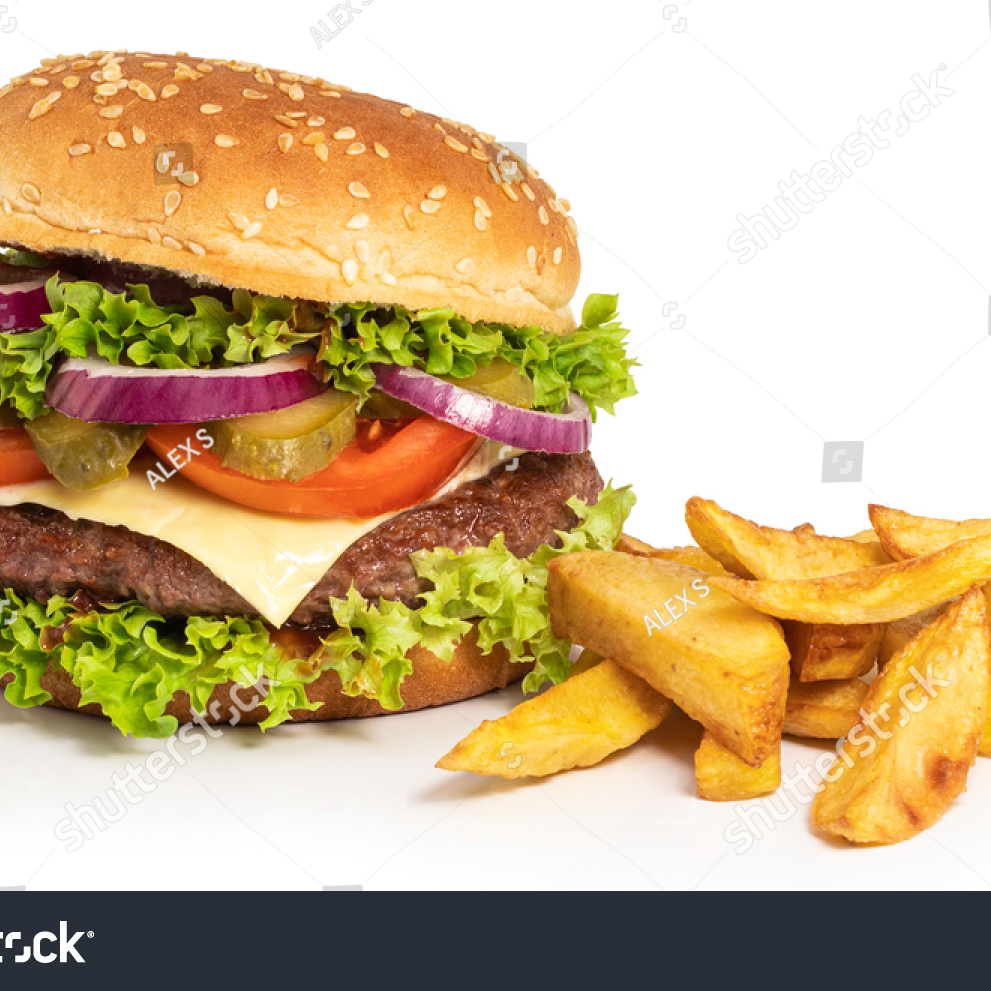

In [18]:
img

0 - greens,avocados and plate
1 - table
2 - species,greens
3- fried vegies, noodles
4 - nothing

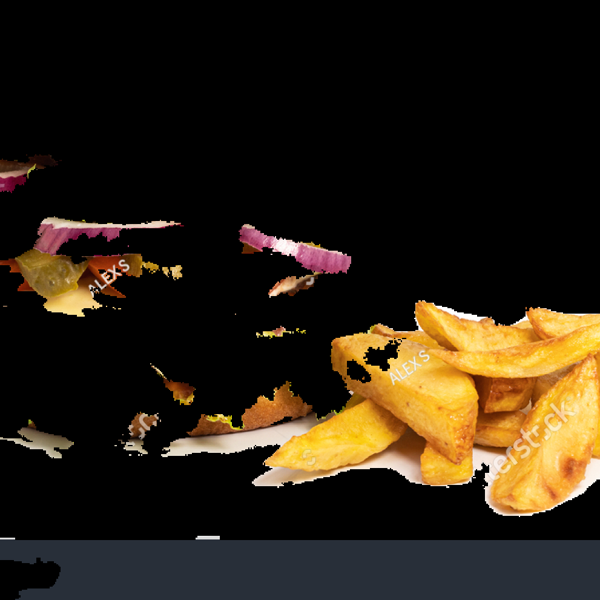

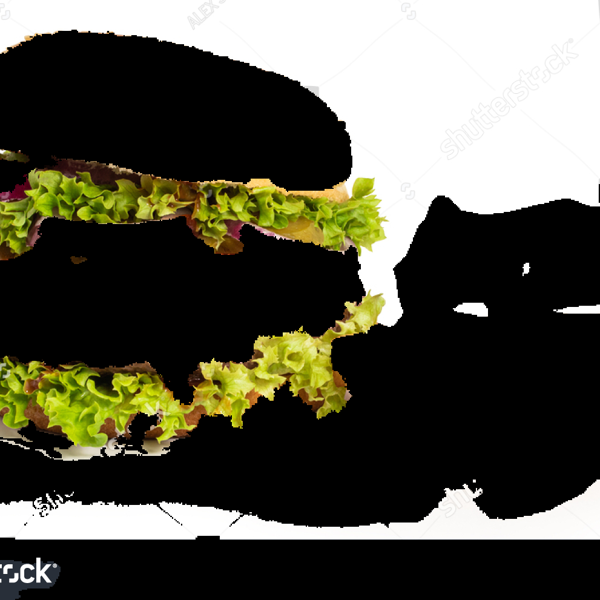

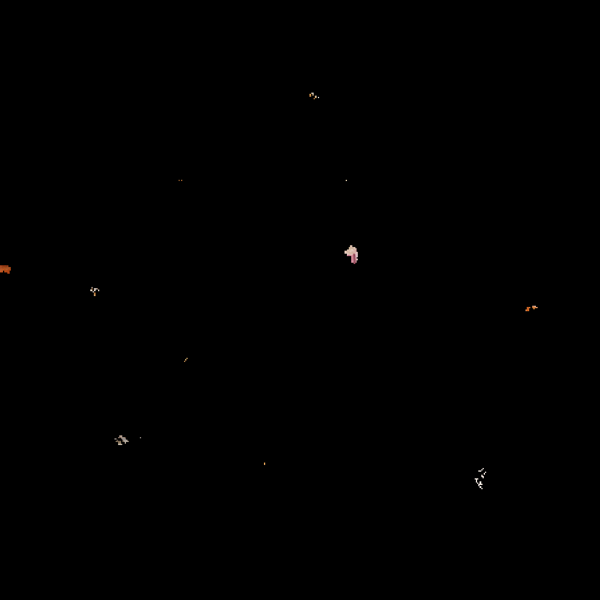

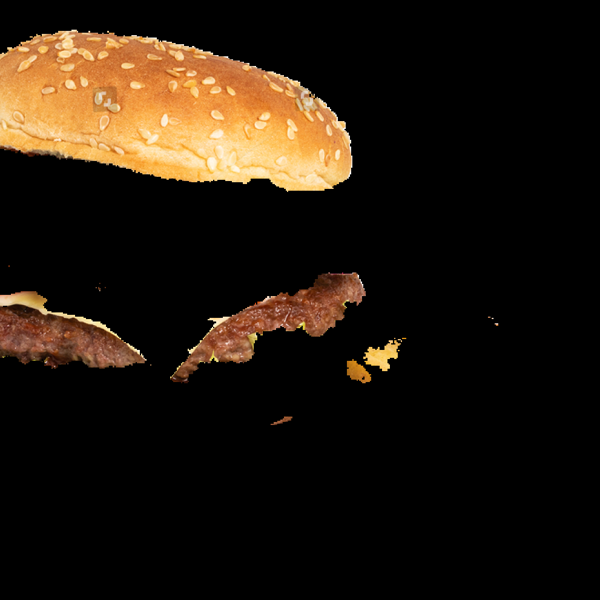

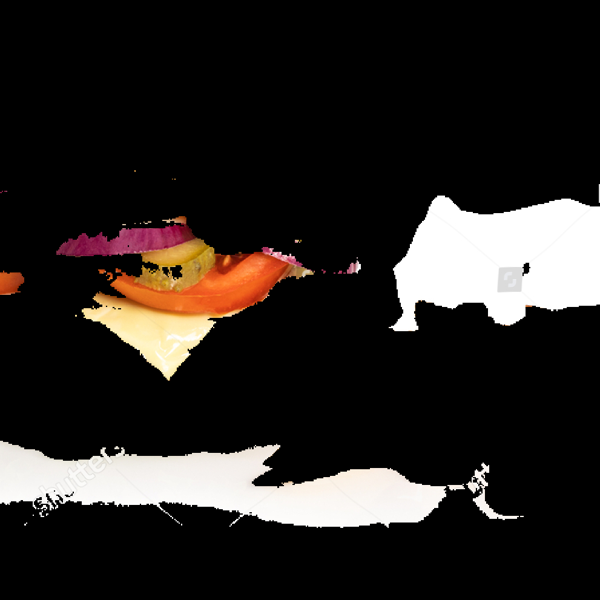

In [19]:
for selectd_class in range(5):
    pred_ = np.where(pred==selectd_class,1,0)
    
    mask = exptrapolate(pred_,img.size[1])

    img_ = np.array(img) * np.stack([mask]*3).T
    display(Image.fromarray(img_.astype(np.uint8)).resize((600,600)))

In [20]:
!nbdev_build_lib

Converted 00_clipmodel.ipynb.
Converted 00_custom_pandas.ipynb.
Converted 00_paths.ipynb.
Converted 00_progress_check.ipynb.
Converted 00_psql.ipynb.
Converted 00_qdrant.ipynb.
Converted 00_tools.ipynb.
Converted 01_search copy.ipynb.
Converted 01_search.ipynb.
Converted 02_onehot.ipynb.
Converted colr_segmentation.ipynb.
Converted food_clustering.ipynb.
Converted inference.ipynb.
Converted search_segmented.ipynb.
Converted search_segmented_stable.ipynb.
Converted search_segmented_stego.ipynb.
Converted stats.ipynb.
Converted stego.ipynb.
Converted update_qdrant.ipynb.
Converted usda_parsing.ipynb.
Converted weird_results_of_image2image.ipynb.
